In [89]:
import os
import numpy as np

from scipy.signal import welch

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from theoc.oc import oscillatory_coupling

# Run an experiment

In [2]:
stim_rate = 10
m = stim_rate * 2
print(stim_rate, m)
result = oscillatory_coupling(stim_rate=stim_rate, m=m, g_max=8, g=2)

10 20


# Visualize the result
## Drive rate

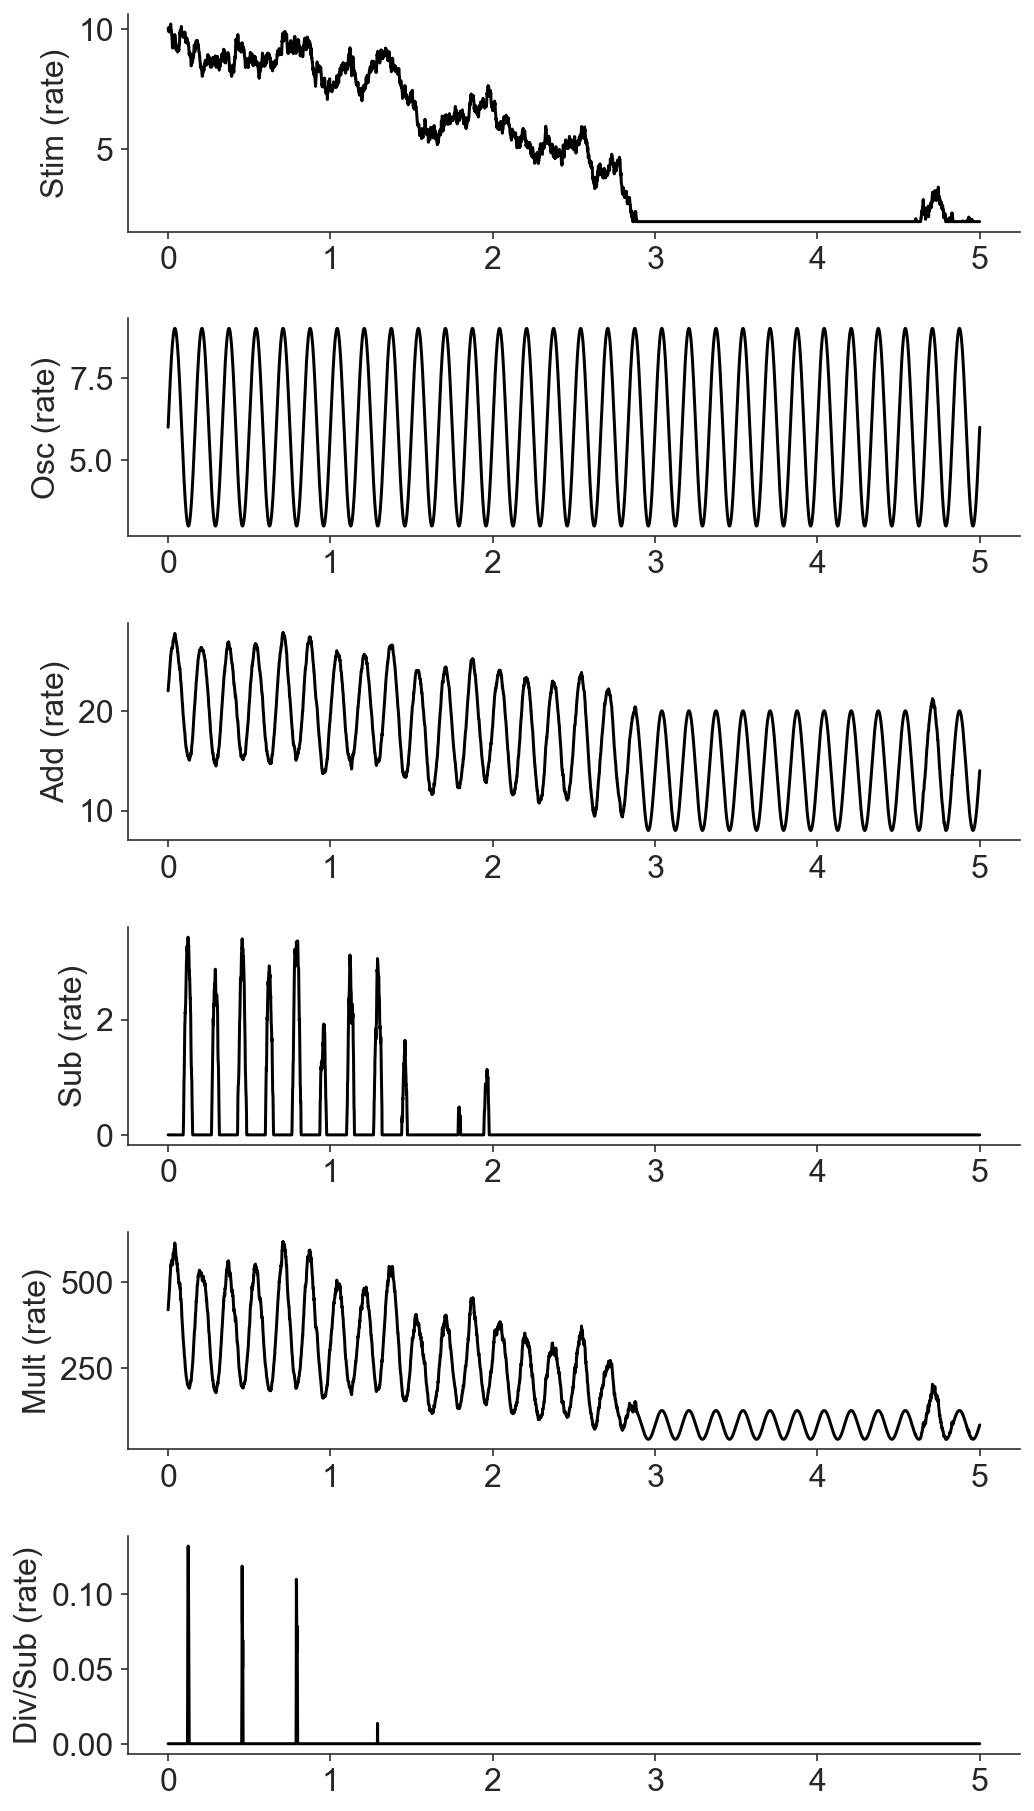

In [3]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["bias"]["osc"]
stim = result["bias"]["stim"]
add = result["bias"]["add"]
sub = result["bias"]["sub"]
mult = result["bias"]["mult"]
div_sub = result["bias"]["div_sub"]

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.ylabel("Stim (rate)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.ylabel("Osc (rate)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.ylabel("Add (rate)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.ylabel("Sub (rate)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.ylabel("Mult (rate)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.ylabel("Div/Sub (rate)")
sns.despine()

## Poisson rate

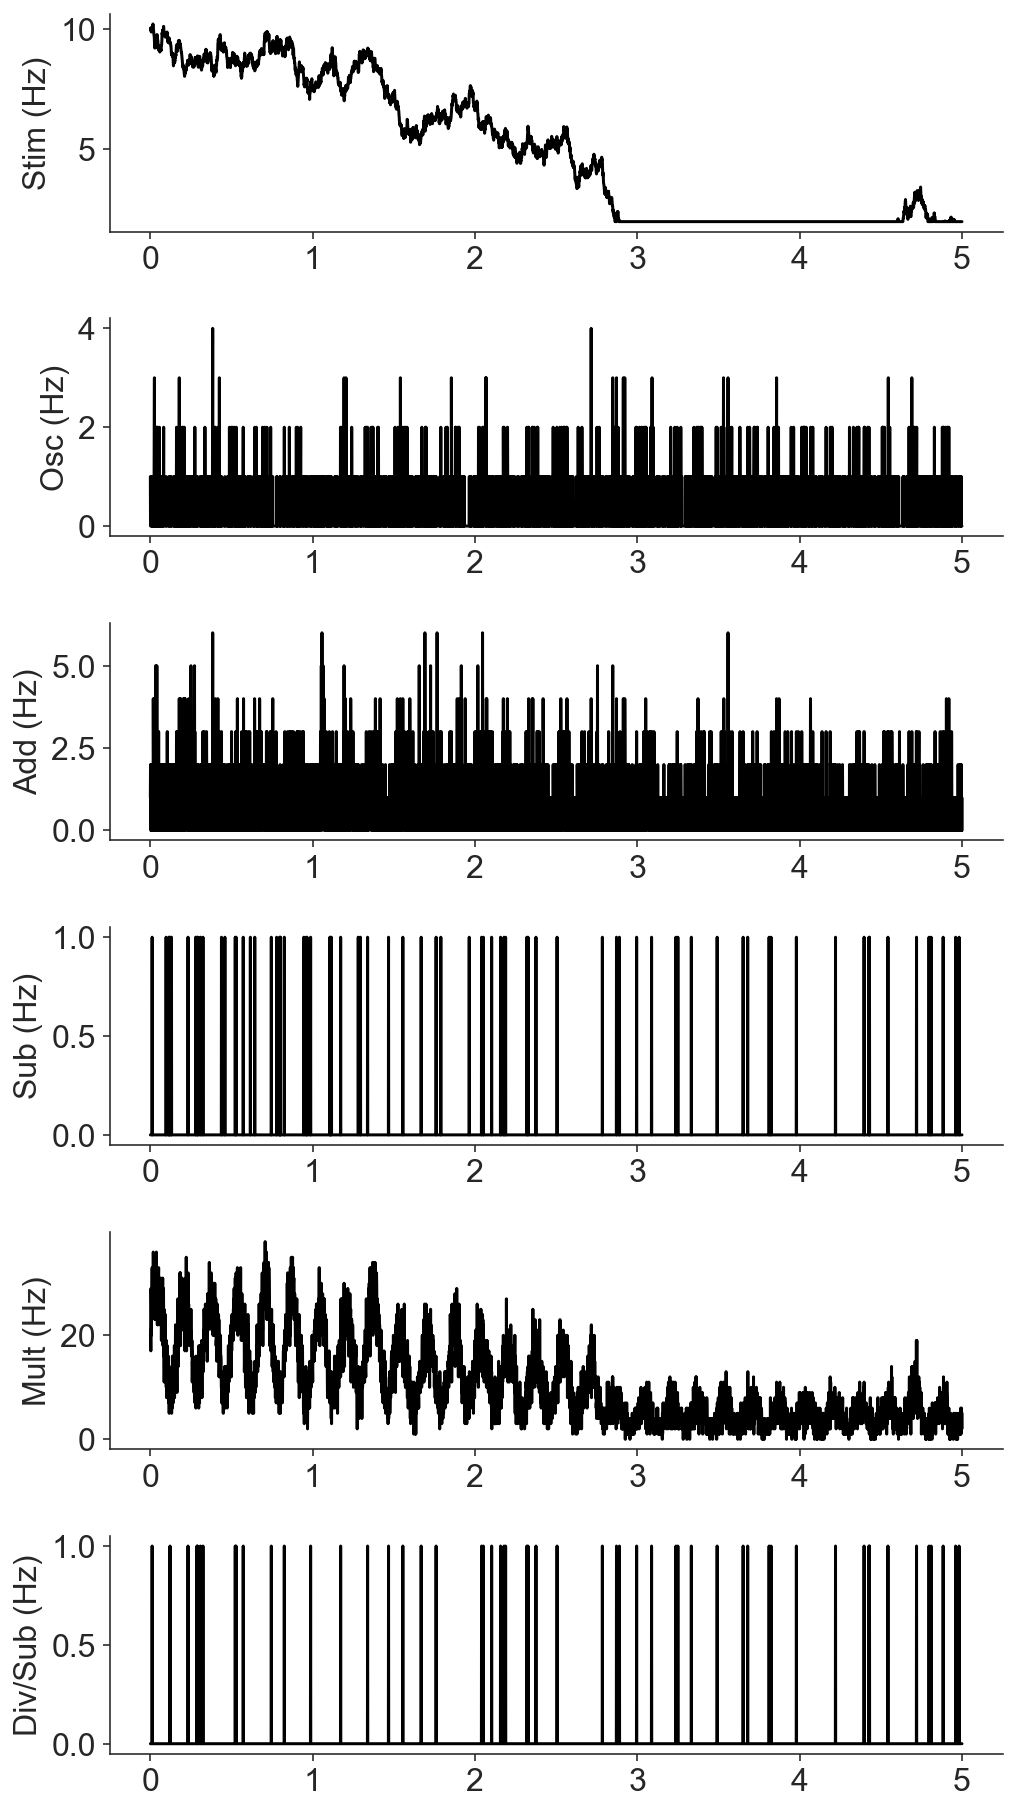

In [4]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["spikes"]["osc_p"].sum(1)
stim = result["bias"]["stim"]
add = result["spikes"]["add_p"].sum(1)
sub = result["spikes"]["sub_p"].sum(1)
mult = result["spikes"]["mult_p"].sum(1)
div_sub = result["spikes"]["div_sub_p"].sum(1)

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.ylabel("Osc (Hz)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.ylabel("Add (Hz)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.ylabel("Sub (Hz)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.ylabel("Mult (Hz)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.ylabel("Div/Sub (Hz)")
sns.despine()

## Rescaled Poisson

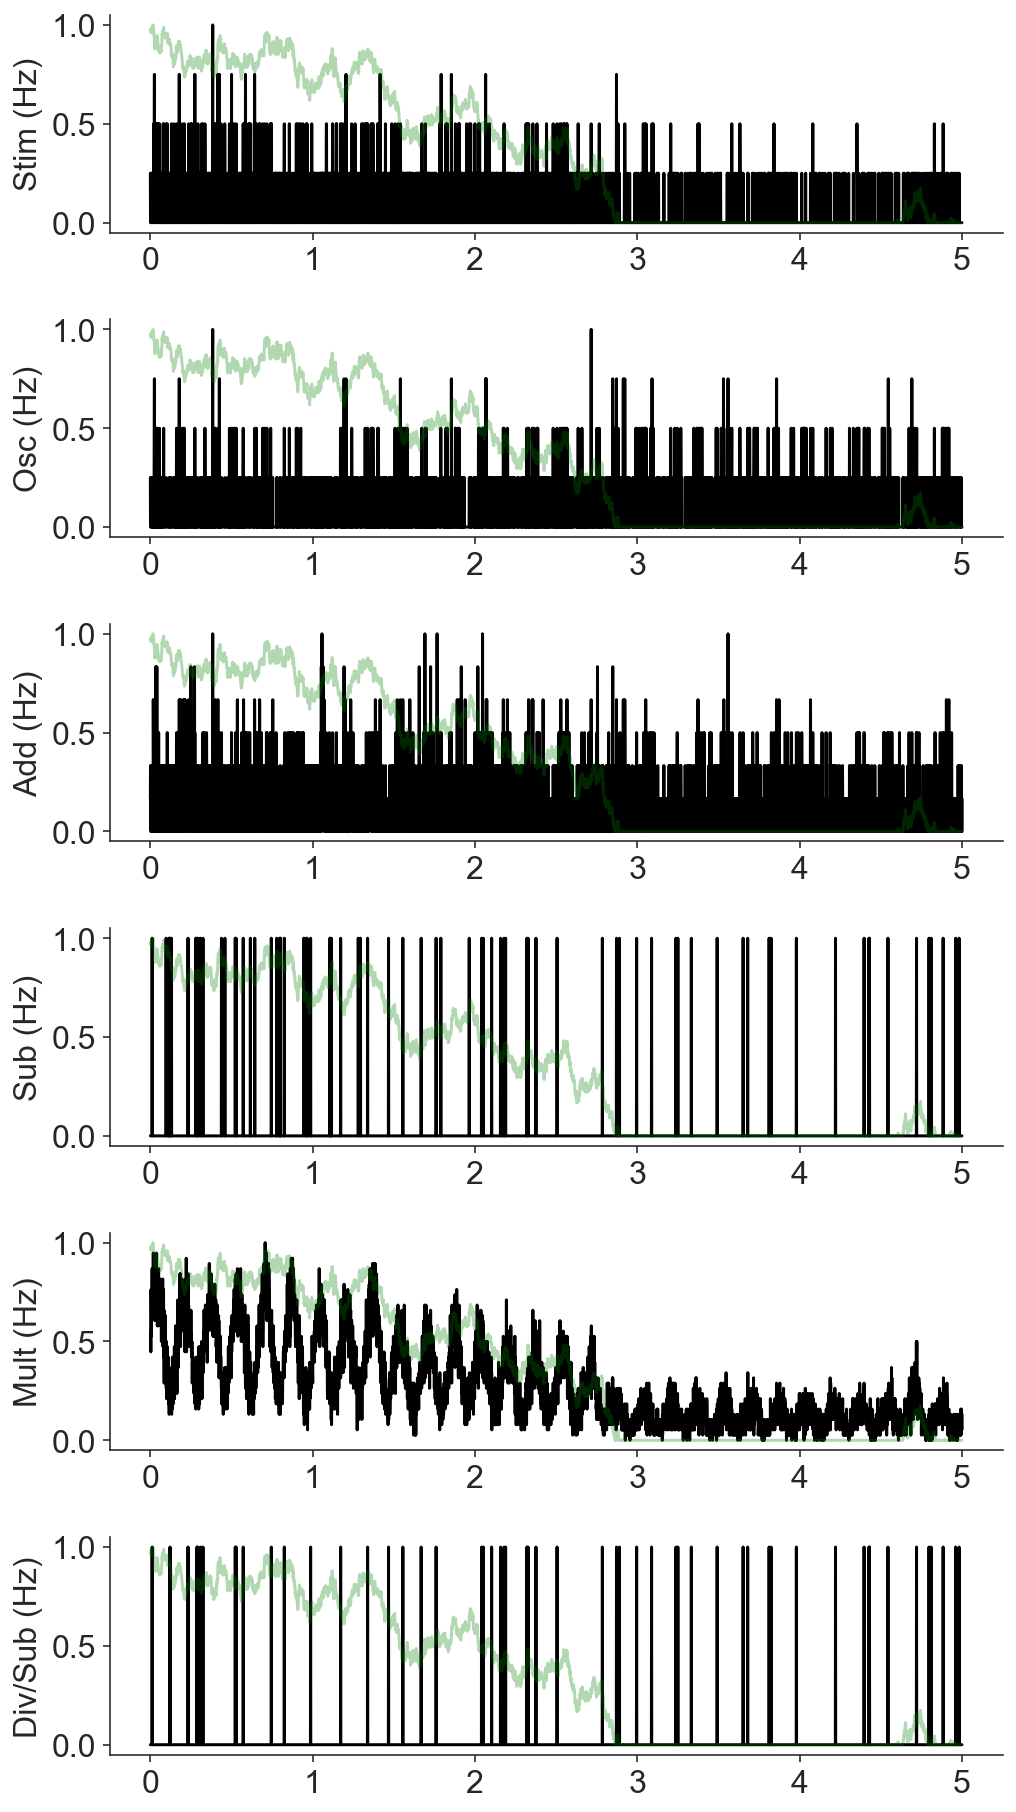

In [5]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["rescaled"]["osc_p"]
stim_ref = result["rescaled"]["stim_ref"]
stim = result["rescaled"]["stim_p"]
add = result["rescaled"]["add_p"]
sub = result["rescaled"]["sub_p"]
mult = result["rescaled"]["mult_p"]
div_sub = result["rescaled"]["div_sub_p"]

# ---
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.plot(times, stim, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.plot(times, osc, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Osc (Hz)")
sns.despine()

plt.subplot(grid[2, 0])
plt.plot(times, add, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Add (Hz)")
sns.despine()

plt.subplot(grid[3, 0])
plt.plot(times, sub, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Sub (Hz)")
sns.despine()

plt.subplot(grid[4, 0])
plt.plot(times, mult, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Mult (Hz)")
sns.despine()

plt.subplot(grid[5, 0])
plt.plot(times, div_sub, color="black")
plt.plot(times, stim_ref, color="green", alpha=0.3)
plt.ylabel("Div/Sub (Hz)")
sns.despine()

# Histograms

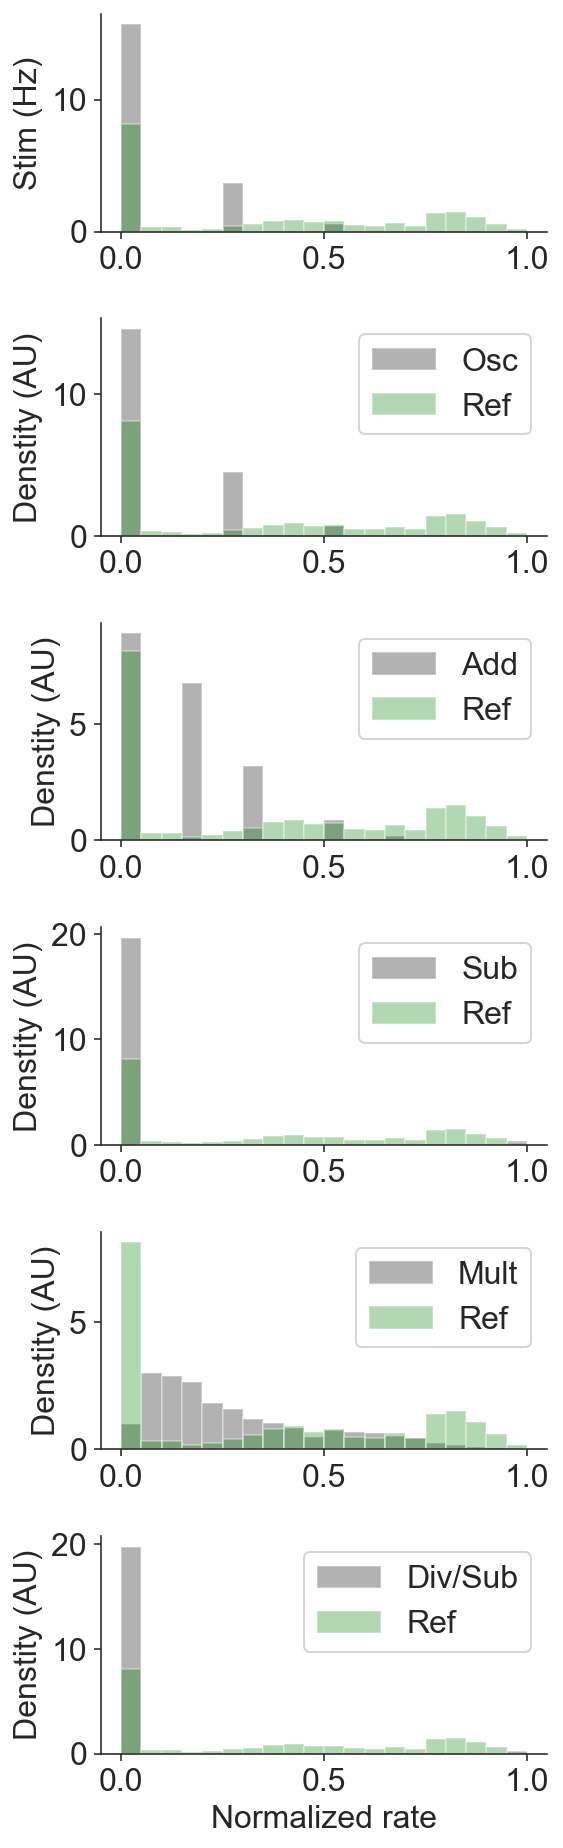

In [6]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["rescaled"]["osc_p"]
stim_ref = result["rescaled"]["stim_ref"]
stim = result["rescaled"]["stim_p"]
add = result["rescaled"]["add_p"]
sub = result["rescaled"]["sub_p"]
mult = result["rescaled"]["mult_p"]
div_sub = result["rescaled"]["div_sub_p"]

# ---
fig = plt.figure(figsize=(4, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.hist(stim, color="black", alpha=0.3, bins=m, density=True, label="Stim")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Stim (Hz)")
sns.despine()

plt.subplot(grid[1, 0])
plt.hist(osc, color="black", alpha=0.3, bins=m, density=True, label="Osc")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[2, 0])
plt.hist(add, color="black", alpha=0.3, bins=m, density=True, label="Add")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[3, 0])
plt.hist(sub, color="black", alpha=0.3, bins=m, density=True, label="Sub")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[4, 0])
plt.hist(mult, color="black", alpha=0.3, bins=m, density=True, label="Mult")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Denstity (AU)")
plt.legend()
sns.despine()

plt.subplot(grid[5, 0])
plt.hist(div_sub, color="black", alpha=0.3, bins=m, density=True, label="Div/Sub")
plt.hist(stim_ref, color="green", alpha=0.3, bins=m, density=True, label="Ref")
plt.ylabel("Denstity (AU)")
plt.legend()
plt.xlabel("Normalized rate")
sns.despine()

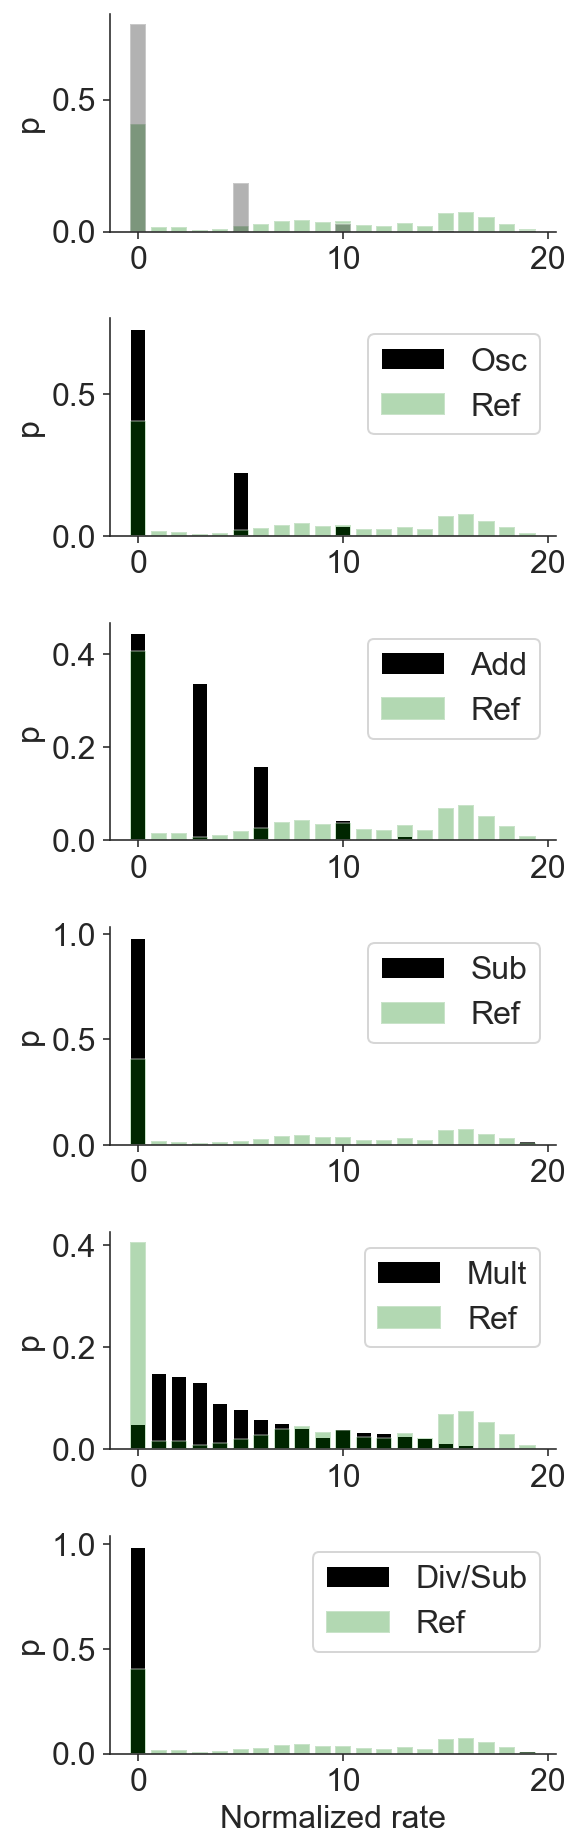

In [7]:
# ---
# Unpack rates, and plot 
times = result["times"]
osc = result["p_y"]["osc_p"]
stim = result["p_y"]["stim_p"]
stim_ref = result["p_y"]["stim_ref"]
add = result["p_y"]["add_p"]
sub = result["p_y"]["sub_p"]
mult = result["p_y"]["mult_p"]
div_sub = result["p_y"]["div_sub_p"]

# ---
fig = plt.figure(figsize=(4, 16))
grid = plt.GridSpec(6, 1, wspace=0.1, hspace=0.4)

plt.subplot(grid[0, 0])
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.bar(range(m), stim, color="black", alpha=0.3, label="Stim")
plt.ylabel("p")
sns.despine()

plt.subplot(grid[1, 0])
plt.bar(range(m), osc, color="black", label="Osc")
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.ylabel("p")
plt.legend()
sns.despine()

plt.subplot(grid[2, 0])
plt.bar(range(m), add, color="black", label="Add")
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.ylabel("p")
plt.legend()
sns.despine()

plt.subplot(grid[3, 0])
plt.bar(range(m), sub, color="black", label="Sub")
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.ylabel("p")
plt.legend()
sns.despine()

plt.subplot(grid[4, 0])
plt.bar(range(m), mult, color="black", label="Mult")
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.ylabel("p")
plt.legend()
sns.despine()

plt.subplot(grid[5, 0])
plt.bar(range(m), div_sub, color="black", label="Div/Sub")
plt.bar(range(m), stim_ref, color="green", alpha=0.3, label="Ref")
plt.ylabel("p")
plt.legend()
plt.xlabel("Normalized rate")
sns.despine()

## MI (Poisson)

In [8]:
result["MI"]

{'back_p': 0.47488667109956184,
 'osc_p': 0.5489345022024894,
 'stim_p': 0.5316601240405889,
 'mult_p': 0.9582887497888002,
 'add_p': 0.6440068244749556,
 'sub_p': 0.4080897089468001,
 'div_sub_p': 0.40248634289715346}

In [9]:
result["MI"]["mult_p"] - result["MI"]["stim_p"]

0.42662862574821125

In [10]:
result["MI"]["add_p"] - result["MI"]["stim_p"]

0.11234670043436668

In [11]:
result["MI"]["sub_p"] - result["MI"]["stim_p"]

-0.12357041509378885

In [12]:
result["MI"]["div_sub_p"] - result["MI"]["stim_p"]

-0.12917378114343547

# Spectral analysis

- Power spectra

Text(0, 0.5, 'Spectral density')

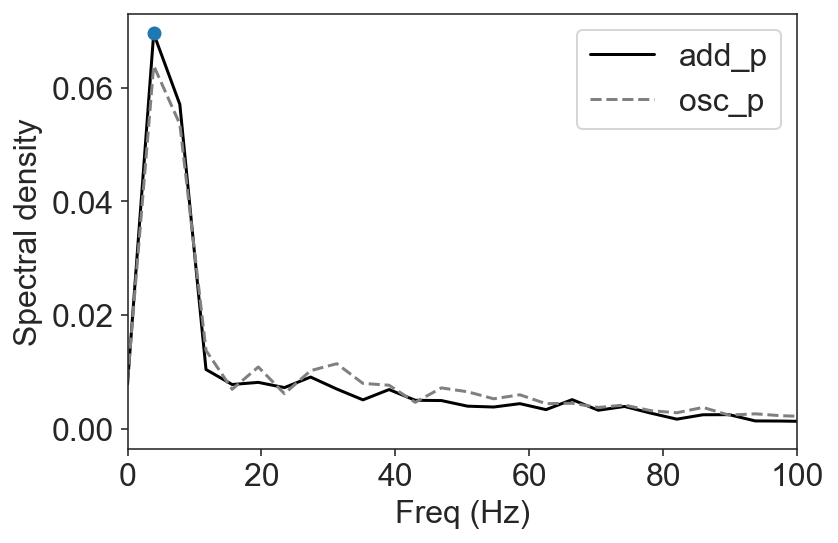

In [88]:
key = "add_p"
freq, spectrum = welch(result["lfp"][key], fs=1000, scaling='density', average='median')
max_point = np.argmax(spectrum)
freq[max_point], spectrum[max_point]

# --
# Use osc alone as the reference point
freq_ref, spectrum_ref = welch(result["lfp"]["osc_p"], fs=1000, scaling='density', average='median')
max_ref = np.argmax(spectrum)

# --
plt.plot(freq, spectrum, color="black", label=key)
plt.plot(freq, spectrum_ref, color="grey", linestyle="--", label="osc_p")
plt.plot(freq[max_point], spectrum[max_point], marker="o")
plt.legend()
plt.xlim(0, 100)
plt.xlabel("Freq (Hz)")
plt.ylabel("Spectral density")